In [1]:
import pandas as pd
import sqlite3 as sq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, re
import nltk
from IPython.display import Image
import datetime
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_pickle('categories_processed.pickle')

In [3]:
ids = pd.read_pickle("matched_setup_processed.pickle")

In [4]:
studied_persons = [int(x) for x in (list(ids['high'].values)+list(ids['low'].values))]

In [9]:
## merge coffe and coffe late

In [10]:
df["coffee"] = df["coffee"] + df["cappuccino_latte"]

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
categories =  ['lunch meal',
        'coffee',
        'viennoiserie',
        'sandwich',
        'soft drink PET',
        'salad',
        'fruit',
        'tea',
        'desert',
        'fruit juice bottle',
        'water',
        'condiment',
        'small chocolate',
        'panini',
        'soup',
        'pizza',
        'hot choco',
        'yaourt',
        'ice cream',
        'fresh juice',
        'bread',
        'sweets',
        'coffee vm',
        'snack vm',
        'wrap',
        'sweet crepe',
        'energy drink',
        'drinks vm',
        'healthy snack',
        'salad buffet',
        'kebab',
        'beer',
        'vending machine',
        'evening meal',
        'sugar snack']


labels = ['lunch meal',
        'coffee',
        'pastry',
        'sandwich',
        'soft drink',
        'salad',
        'fruit',
        'tea',
        'dessert',
        'fruit juice',
        'water',
        'condiment',
        'chocolate',
        'panini',
        'soup',
        'pizza',
        'hot chocolate',
        'yogurt',
        'ice cream',
        'fresh juice',
        'bread',
        'sweets',
        'coffee vending machine',
        'snack vending machine',
        'wrap',
        'crepe',
        'energy drink',
        'drinks vending machine',
        'snack',
        'salad buffet',
        'kebab',
        'beer',
        'vending machine',
        'evening meal',
        'sweet snack']

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

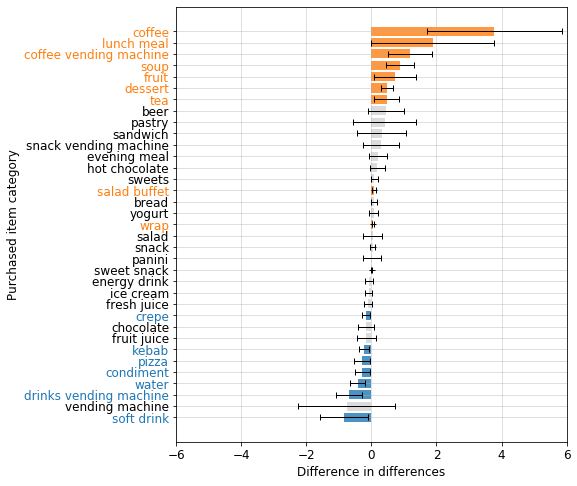

In [14]:
fig, ax = plt.subplots(1,1,figsize= (7,8))

coeff_diff = []
ste = []

for cat in categories:
    mod = smf.ols(formula="Q('"+cat + "') ~ C(partner_type, Treatment(reference='l'))*C(condition, Treatment(reference='pre'))",data=df)
    res = mod.fit()

    coeff_diff.append(res.params["C(partner_type, Treatment(reference='l'))[T.h]:C(condition, Treatment(reference='pre'))[T.post]"])
    ste.append(res.bse["C(partner_type, Treatment(reference='l'))[T.h]:C(condition, Treatment(reference='pre'))[T.post]"])

l1, l2, l3 = zip(*sorted(zip(coeff_diff,labels, ste)))


selected_topics = []
color_errorbar = []
for cnt,i in enumerate(l2):
    if l1[cnt]<0 and l1[cnt]+l3[cnt]<0:
        selected_topics.append(l2[cnt])
        color_errorbar.append("tab:blue")
    elif l1[cnt]>0 and l1[cnt]-l3[cnt]>0:
        selected_topics.append(l2[cnt])
        color_errorbar.append("tab:orange")
    else:
        color_errorbar.append("lightgray")
        
plt.errorbar(l1, np.array(range(len(l1))),xerr= 2*np.array(l3), linewidth = 1,color= 'black',
             linestyle = 'none',marker = "_",
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 3)

plt.barh(np.array(range(len(l1))),l1, color = color_errorbar, alpha = 0.8)

#plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

plt.ylabel('Purchased item category')
plt.xlabel('Difference in differences')

plt.xlim([-6,6])


for cnt,i in enumerate(l2):
    if l1[cnt]<0 and l1[cnt]+l3[cnt]<0:
        plt.gca().get_yticklabels()[cnt].set_color("tab:blue")
    elif l1[cnt]>0 and l1[cnt]-l3[cnt]>0:
        plt.gca().get_yticklabels()[cnt].set_color("tab:orange")
    else:
        plt.gca().get_yticklabels()[cnt].set_color("black")
        
plt.grid(alpha = 0.5)

plt.savefig("reg_rq2_2.pdf", bbox_inches='tight')